# Simple Perceptron for logical gates.
some dependecies:


In [1]:
from random import choice,random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# `set_data`
Receives a numpy array `target` thar represents the output of a logical gate and return a list with the next format:
**[x1 | x0 | bias | target]**


In [2]:
def set_data(target):
	x = [np.array([0,0]),
		 np.array([0,1]),
	     np.array([1,0]),
		 np.array([1,1])]
	bias = np.array([1 for _ in range(4)])
	# inputs: [x1 | x0 | bias]
	inputs = np.column_stack((x,bias))
	# return data: [x1 | x0 | bias | target]
	return [(np.array(i),j) for i,j in zip(inputs,target)]

# Activation function
I used a Heaviside as a threshold.

In [3]:
heaviside = lambda x: 1 if x >= 0 else -1

# Training
Given the data target and random weights.
The arguments for the learning rate (`eta`) & number of iterations (`epochs`) are optional. Returns the weights updated and the error.


In [4]:
def train(data,w,eta=0.1,epochs=40):
	# Activation function
	errors = []
	#w_tmp = []
	# Updating weights
	for _ in range(epochs):
		x,expected = choice(data)
		result = np.dot(w,x)
		error = expected - heaviside(result)
		errors.append(error)
		w += eta*error*x
	return [w,error]

# Predicting
Receives a vector to test and the weights. 

**Note:** The vector must includes the bias. 

i.e:
`predict([x1,x0,1],w)`

In [5]:
def predict(inputs,w):
	# inputs: X + bias
	return 1 if np.dot(inputs,w) >= 0 else -1

# Display

Plotting the outputs of the logical gate and the line that represents the decision boundary.
The triangles represent a 0 & the circles a 1.

In [6]:
def display(data,w):
	for dot in data:
		inputs,y = dot
		if y > 0:
			plt.scatter(inputs[0],inputs[1],color = 'g',s=200)
		else:plt.scatter(inputs[0],inputs[1],marker='^',color = 'b',s=200)
	plt.grid()
	plt.title('truth table')
	x1 = -0.1
	y1 = (-w[2] - w[0] * x1) / w[1]
	print(x1,y1)
	x2 = 1.2
	y2 = (-w[2] - w[0] * x2) / w[1]
	print(x2,y2)
	plt.plot([x1,x2],[y1,y2],label="Decision boundery",lw=2)
	plt.legend(loc='upper right')
	plt.show()

# Run

Running & training the perceptron.

**Note** In the numpy array `target` a 0 is represented by a -1.

random weights: [ 0.29065932  0.03606822  0.32724607]
weights updated: [-0.30934068 -0.36393178  0.52724607]
Predicting	Aproximation	Result
[0, 0]		0.52725		1
[0, 1]		0.16331		1
[1, 0]		0.21791		1
[1, 1]		-0.14603	-1
-0.1 1.53374937074
1.2 0.428754133195


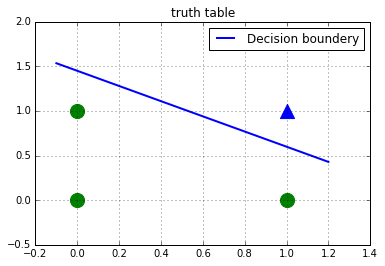

In [7]:
def run():
	# output for a nand gate
	target = np.array([1,1,1,-1])
	# Random weights
	w = np.array([random() for _ in range(3)])
	print("random weights: {0}".format(w))
	nand = set_data(target)
	w,error = train(nand,w,eta=0.1,epochs=100)
	print("weights updated: {0}".format(w))
	print("Predicting\tAproximation\tResult")
	print("{0}\t\t{1:.5f}\t\t{2}".format([0,0],np.dot([0,0,1],w),predict([0,0,1],w)))
	print("{0}\t\t{1:.5f}\t\t{2}".format([0,1],np.dot([0,1,1],w),predict([0,1,1],w)))
	print("{0}\t\t{1:.5f}\t\t{2}".format([1,0],np.dot([1,0,1],w),predict([1,0,1],w)))
	print("{0}\t\t{1:.5f}\t{2}".format([1,1],np.dot([1,1,1],w),predict([1,1,1],w)))
	display(nand,w)

if __name__ == '__main__':
	run()